In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors

In [ ]:
# second = 198
# print(f"{second//60} minutes {second%60} seconds")
# minutes = 16
# seconds = 00
# print(f"{minutes*60+seconds} seconds")

3 minutes 18 seconds


In [2]:
!ls ../../../../../mnt/e/Deep\ Learning\ Analysis/Predictions/

Fondeo2_Model31		      NOWOPAMDAY_Downsampled_Model23
NOWOPAMDAY_310102_06_Model31  WOPAMDAY_Model22


In [4]:
PREDICTIONS = "Fondeo2_Model31"

In [5]:
import pandas as pd

# Load CSV predictions.csv
df = pd.read_csv(f'../../../../../mnt/e/Deep Learning Analysis/Predictions/{PREDICTIONS}/predictions.csv')
df

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
0,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_15-53-43_48kHz.wav,0,3,Background,0.994056,"[0.9940558671951294, 0.00594412861391902]"
1,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_15-53-43_48kHz.wav,3,6,Background,0.993342,"[0.9933423399925232, 0.006657704245299101]"
2,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_15-53-43_48kHz.wav,6,9,Background,0.990628,"[0.990628182888031, 0.009371769614517689]"
3,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_15-53-43_48kHz.wav,9,12,Background,0.987623,"[0.9876234531402588, 0.012376519851386547]"
4,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_15-53-43_48kHz.wav,12,15,Background,0.992780,"[0.9927797913551331, 0.00722017465159297]"
...,...,...,...,...,...,...,...
479384,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-13_07-18-14_48kHz.wav,285,288,Background,0.982023,"[0.9820234179496765, 0.017976542934775352]"
479385,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-13_07-18-14_48kHz.wav,288,291,Background,0.866458,"[0.8664583563804626, 0.13354168832302094]"
479386,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-13_07-18-14_48kHz.wav,291,294,Background,0.955901,"[0.9559006094932556, 0.04409940913319588]"
479387,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-13_07-18-14_48kHz.wav,294,297,Background,0.951665,"[0.9516652226448059, 0.048334795981645584]"


In [6]:
CLASSES_MAPPING = {
    'Background': 0,
    'BottlenoseDolphin': 1,
    'CommonDolphin': 2,
    "Grampus_Risso'sDolphin": 3,
    'HarborPorpoise': 4,
    'KillerWhale': 5,
    'Long_FinnedPilotWhale': 6,
    'StripedDolphin': 7
}

## Define class mapping
CLASSES_MAPPING = {
    'Background': 0,
    'Whistle': 1,
}



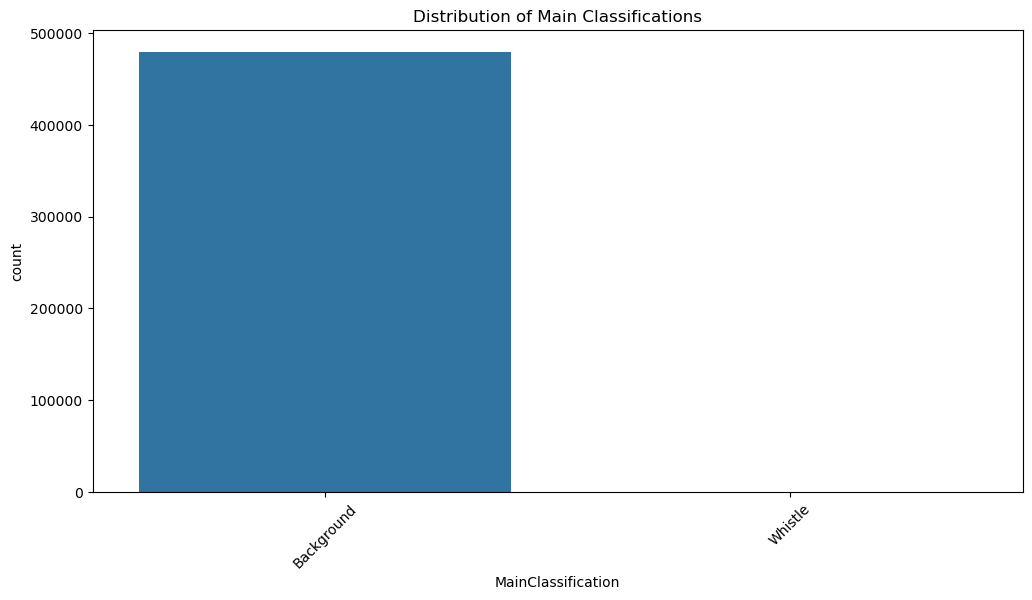

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of main classifications
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='MainClassification', order=df['MainClassification'].value_counts().index)
plt.title('Distribution of Main Classifications')
plt.xticks(rotation=45)
plt.show()

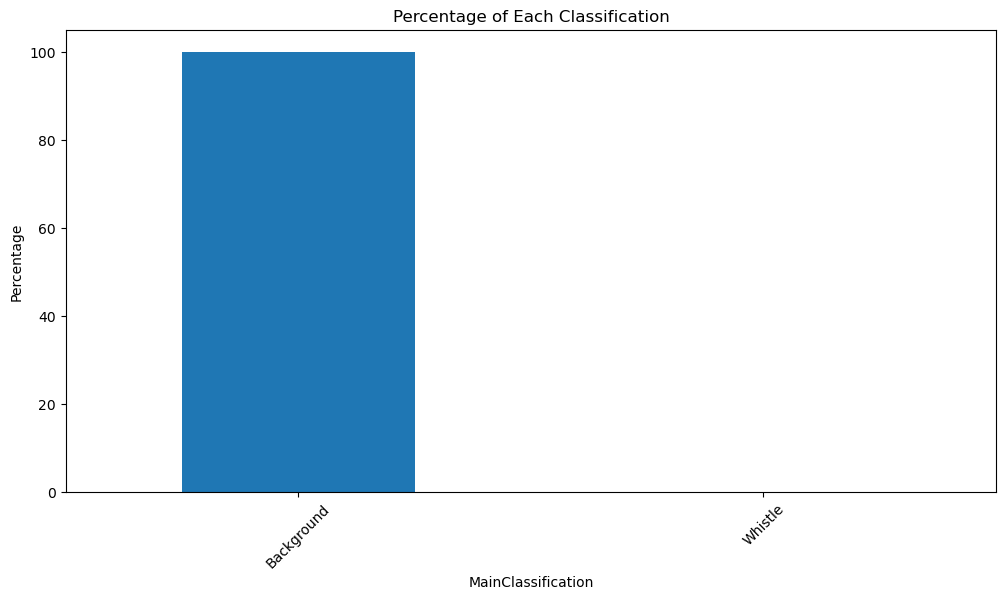

MainClassification
Background    99.967667
Whistle        0.032333
Name: proportion, dtype: float64


In [9]:
# Calculate the percentage of each classification
classification_counts = df['MainClassification'].value_counts(normalize=True) * 100

# Plot the percentage of each classification
plt.figure(figsize=(12, 6))
classification_counts.plot(kind='bar')
plt.title('Percentage of Each Classification')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

print(classification_counts)

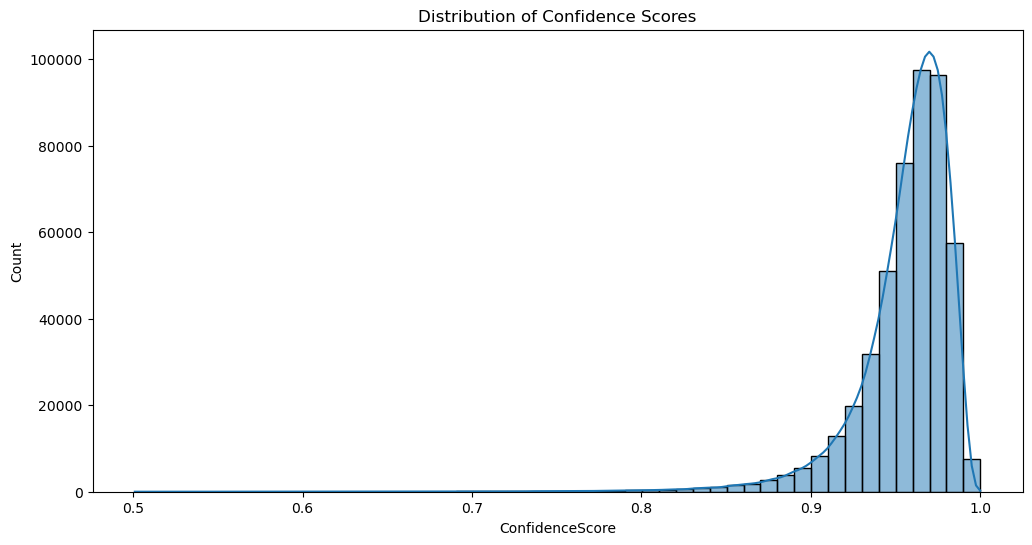

In [10]:
# Plot the distribution of confidence scores
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='ConfidenceScore', bins=50, kde=True)
plt.title('Distribution of Confidence Scores')
plt.show()

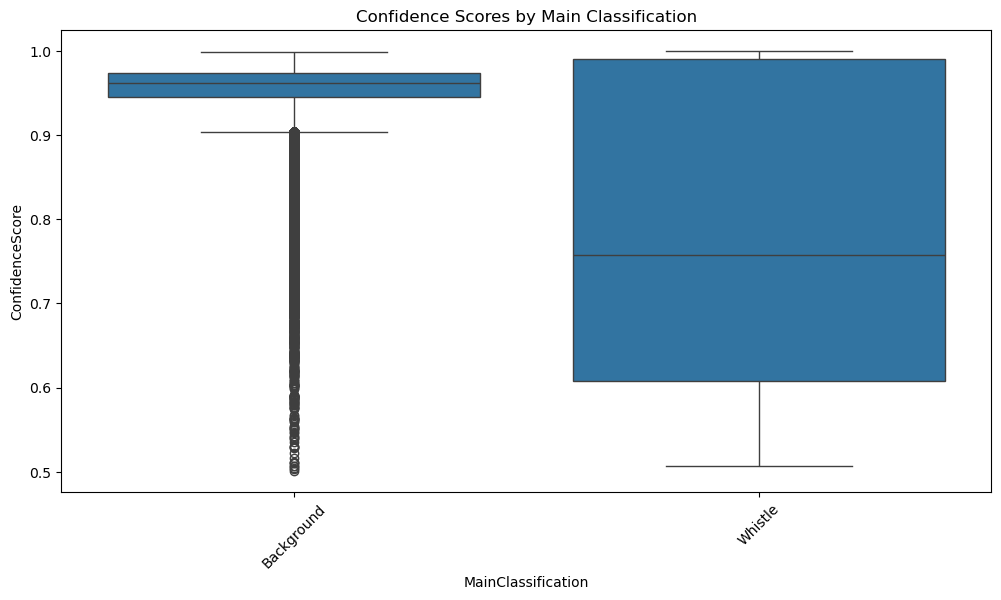

In [11]:
# Plot the confidence scores by main classification
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MainClassification', y='ConfidenceScore', order=df['MainClassification'].value_counts().index)
plt.title('Confidence Scores by Main Classification')
plt.xticks(rotation=45)
plt.show()

1716


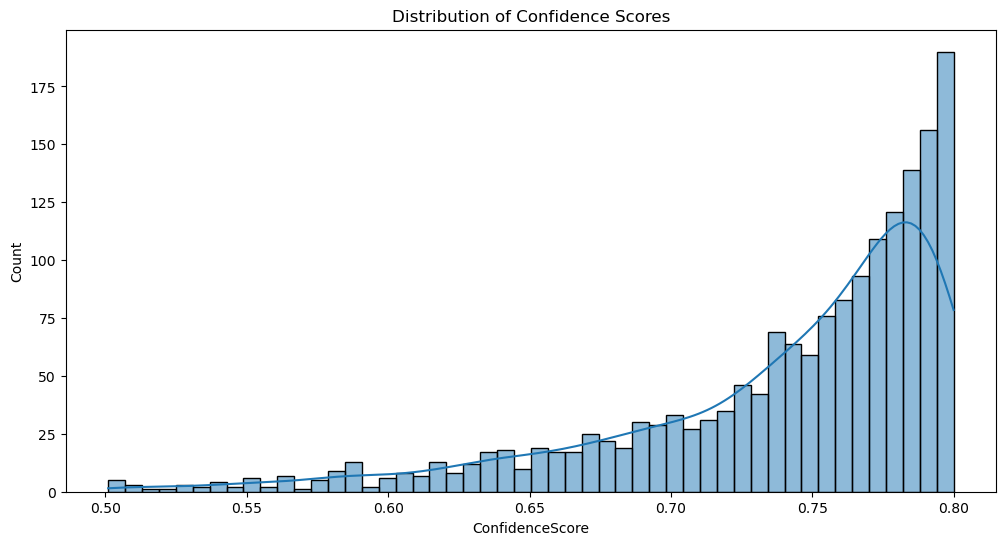

In [12]:
# Check how many Main Background have lower confidence score of 0.6
low_confidence = df[(df['MainClassification'] == 'Background') & (df['ConfidenceScore'] < 0.8)]

print(len(low_confidence))

# Plot the distribution of confidence scores
plt.figure(figsize=(12, 6))
sns.histplot(data=low_confidence, x='ConfidenceScore', bins=50, kde=True)
plt.title('Distribution of Confidence Scores')
plt.show()

In [13]:
# # Calculate the abundance of each classification per file
# abundance_per_file = df.groupby(['Filename', 'MainClassification']).size().unstack(fill_value=0)

# # Plot the abundance of each classification per file
# abundance_per_file.plot(kind='bar', stacked=True, figsize=(20, 10))
# plt.title('Abundance of Each Classification per File')
# plt.ylabel('Count')
# plt.xticks()
# plt.show()

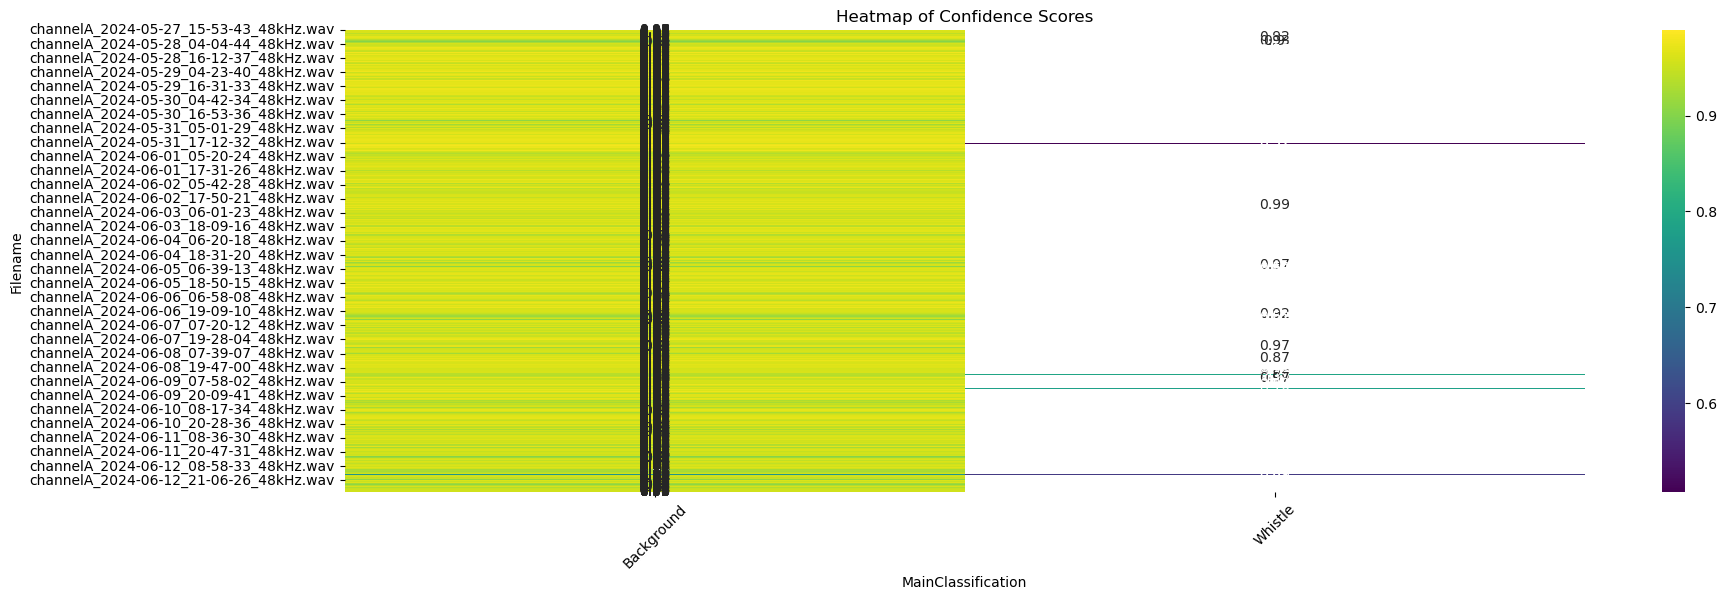

In [13]:
# # Create a pivot table for the heatmap
# heatmap_data = df.pivot_table(index='Filename', columns='MainClassification', values='ConfidenceScore', aggfunc='mean')

# # Plot the heatmap of confidence scores
# plt.figure(figsize=(20, 6))
# sns.heatmap(heatmap_data, annot=True, cmap='viridis')
# plt.title('Heatmap of Confidence Scores')
# plt.xticks(rotation=45)
# plt.show()

In [14]:
df

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
0,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_15-53-43_48kHz.wav,0,3,Background,0.994056,"[0.9940558671951294, 0.00594412861391902]"
1,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_15-53-43_48kHz.wav,3,6,Background,0.993342,"[0.9933423399925232, 0.006657704245299101]"
2,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_15-53-43_48kHz.wav,6,9,Background,0.990628,"[0.990628182888031, 0.009371769614517689]"
3,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_15-53-43_48kHz.wav,9,12,Background,0.987623,"[0.9876234531402588, 0.012376519851386547]"
4,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_15-53-43_48kHz.wav,12,15,Background,0.992780,"[0.9927797913551331, 0.00722017465159297]"
...,...,...,...,...,...,...,...
479384,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-13_07-18-14_48kHz.wav,285,288,Background,0.982023,"[0.9820234179496765, 0.017976542934775352]"
479385,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-13_07-18-14_48kHz.wav,288,291,Background,0.866458,"[0.8664583563804626, 0.13354168832302094]"
479386,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-13_07-18-14_48kHz.wav,291,294,Background,0.955901,"[0.9559006094932556, 0.04409940913319588]"
479387,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-13_07-18-14_48kHz.wav,294,297,Background,0.951665,"[0.9516652226448059, 0.048334795981645584]"


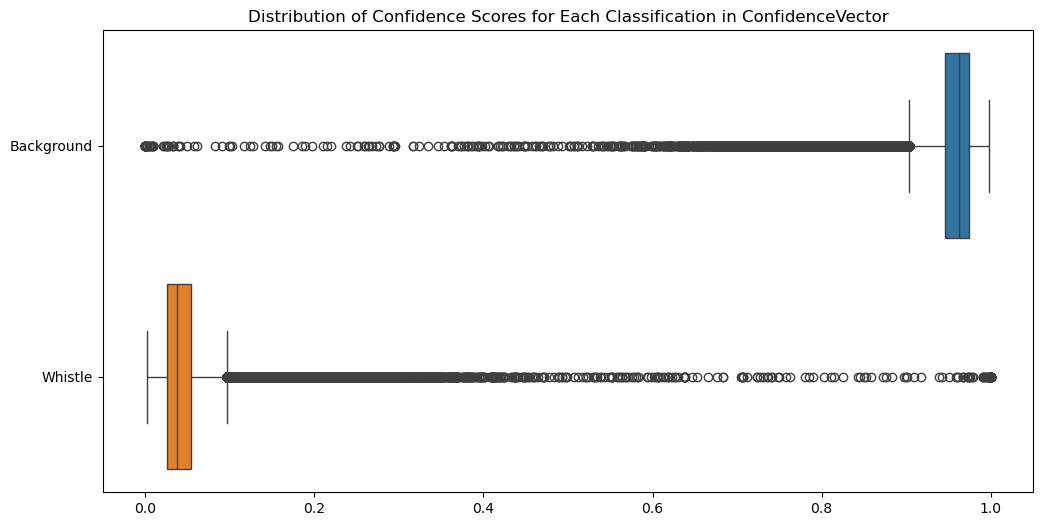

In [15]:
# Check the distribution of the confidence scores for each classification in ConfidenceVector
confidence_vector = df['ConfidenceVector'].apply(eval)
confidence_vector = pd.DataFrame(confidence_vector.tolist(), columns=CLASSES_MAPPING.keys())

plt.figure(figsize=(12, 6))
sns.boxplot(data=confidence_vector, orient='h')
plt.title('Distribution of Confidence Scores for Each Classification in ConfidenceVector')
plt.show()

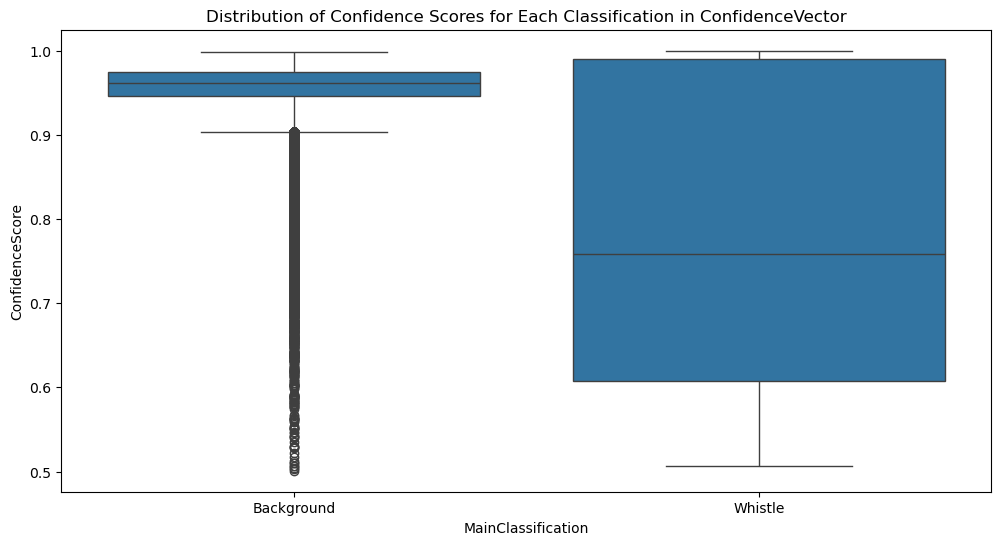

In [16]:
# Check the distribution of the confidence scores for each classification in ConfidenceVector
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MainClassification', y='ConfidenceScore')
plt.title('Distribution of Confidence Scores for Each Classification in ConfidenceVector')
plt.show()

In [17]:
# Load predictions file
# predictions_file = "predictions.csv"  # Replace with your actual file path
# predictions_df = pd.read_csv(predictions_file)

# Reverse mapping for easy lookup
IDX_TO_CLASSES = {v: k for k, v in CLASSES_MAPPING.items()}

In [18]:
def analyze_confidence_vectors(df, ignore_background=False, confidence_threshold=0.5):
    results = []

    for _, row in df.iterrows():
        confidence_vector = eval(row['ConfidenceVector'])  # Convert string to list
        main_class_idx = np.argmax(confidence_vector)
        main_class_score = confidence_vector[main_class_idx]

        # Sort classes by confidence
        sorted_classes = sorted(
            enumerate(confidence_vector), key=lambda x: x[1], reverse=True
        )

        # Filter background if necessary
        if ignore_background:
            sorted_classes = [sc for sc in sorted_classes if sc[0] != CLASSES_MAPPING['Background']]

        # Filter by confidence threshold
        sorted_classes = [sc for sc in sorted_classes if sc[1] >= confidence_threshold]

        # Create a summary for this row
        summary = {
            'Filename': row['Filename'],
            'StartSecond': row['StartSecond'],
            'EndSecond': row['EndSecond'],
            'MainClassification': IDX_TO_CLASSES[main_class_idx],
            'MainConfidenceScore': main_class_score,
            'TopClasses': [
                {
                    'Class': IDX_TO_CLASSES[class_idx],
                    'Score': score
                }
                for class_idx, score in sorted_classes[:5]  # Top 5 classifications
            ]
        }
        results.append(summary)

    return results

# Analyze with and without background, using a confidence threshold of 0.5
# results_with_background = analyze_confidence_vectors(df, ignore_background=False, confidence_threshold=0.3)
# results_without_background = analyze_confidence_vectors(df, ignore_background=True, confidence_threshold=0.3)

In [19]:
# Visualization function
def plot_top_classes(results, title):
    class_counts = {}

    for result in results:
        for entry in result['TopClasses']:
            class_name = entry['Class']
            class_counts[class_name] = class_counts.get(class_name, 0) + 1

    # Sort by frequency
    sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    classes, counts = zip(*sorted_counts)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# # Plot results
# print("Plotting results with background:")
# plot_top_classes(results_with_background, "Top Classes with Background")

# print("\nPlotting results without background:")
# plot_top_classes(results_without_background, "Top Classes without Background")

In [20]:
# Count number of rows per class
print(df['MainClassification'].value_counts())

MainClassification
Background    479234
Whistle          155
Name: count, dtype: int64


In [ ]:
df_no_background = df[df['MainClassification'] != 'Background']
# df_to_save = pd.concat([df_no_background, low_confidence])

In [22]:
df_no_background

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
7088,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_21-43-19_48kHz.wav,288,291,Whistle,0.564021,"[0.435978502035141, 0.5640214681625366]"
7092,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_21-48-19_48kHz.wav,0,3,Whistle,0.978356,"[0.02164352871477604, 0.9783564209938049]"
7100,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_21-48-19_48kHz.wav,24,27,Whistle,0.559729,"[0.4402709901332855, 0.5597289800643921]"
7106,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_21-48-19_48kHz.wav,42,45,Whistle,0.999319,"[0.0006812208448536694, 0.9993188381195068]"
7108,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_21-48-19_48kHz.wav,48,51,Whistle,0.900744,"[0.09925549477338791, 0.9007444381713867]"
...,...,...,...,...,...,...,...
460971,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-12_16-00-33_48kHz.wav,108,111,Whistle,0.619309,"[0.3806910216808319, 0.6193089485168457]"
461244,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-12_16-15-33_48kHz.wav,27,30,Whistle,0.578439,"[0.42156097292900085, 0.5784390568733215]"
461247,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-12_16-15-33_48kHz.wav,36,39,Whistle,0.614954,"[0.38504597544670105, 0.6149540543556213]"
461249,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-12_16-15-33_48kHz.wav,42,45,Whistle,0.606559,"[0.393441379070282, 0.606558620929718]"


In [23]:
# df_no_background["Path"] = df_no_background["Path"].str.split("/mnt/e/").str[1]
df_no_background["Path"] = df_no_background["Path"].str.split("D:/").str[1]
df_no_background

/tmp/ipykernel_155196/2596681554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_background["Path"] = df_no_background["Path"].str.split("D:/").str[1]


,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
7088,Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/BUEN...,channelA_2024-05-27_21-43-19_48kHz.wav,288,291,Whistle,0.564021,"[0.435978502035141, 0.5640214681625366]"
7092,Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/BUEN...,channelA_2024-05-27_21-48-19_48kHz.wav,0,3,Whistle,0.978356,"[0.02164352871477604, 0.9783564209938049]"
7100,Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/BUEN...,channelA_2024-05-27_21-48-19_48kHz.wav,24,27,Whistle,0.559729,"[0.4402709901332855, 0.5597289800643921]"
7106,Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/BUEN...,channelA_2024-05-27_21-48-19_48kHz.wav,42,45,Whistle,0.999319,"[0.0006812208448536694, 0.9993188381195068]"
7108,Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/BUEN...,channelA_2024-05-27_21-48-19_48kHz.wav,48,51,Whistle,0.900744,"[0.09925549477338791, 0.9007444381713867]"
...,...,...,...,...,...,...,...
460971,Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/BUEN...,channelA_2024-06-12_16-00-33_48kHz.wav,108,111,Whistle,0.619309,"[0.3806910216808319, 0.6193089485168457]"
461244,Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/BUEN...,channelA_2024-06-12_16-15-33_48kHz.wav,27,30,Whistle,0.578439,"[0.42156097292900085, 0.5784390568733215]"
461247,Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/BUEN...,channelA_2024-06-12_16-15-33_48kHz.wav,36,39,Whistle,0.614954,"[0.38504597544670105, 0.6149540543556213]"
461249,Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/BUEN...,channelA_2024-06-12_16-15-33_48kHz.wav,42,45,Whistle,0.606559,"[0.393441379070282, 0.606558620929718]"


In [24]:
# save new csv without rows with background
df_no_background.to_csv(f'../../../../../mnt/e/Deep Learning Analysis/Predictions/{PREDICTIONS}/predictions_no_background.csv', index=False)

In [25]:
df[df["MainClassification"] == "Whistle"]

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
7088,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_21-43-19_48kHz.wav,288,291,Whistle,0.564021,"[0.435978502035141, 0.5640214681625366]"
7092,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_21-48-19_48kHz.wav,0,3,Whistle,0.978356,"[0.02164352871477604, 0.9783564209938049]"
7100,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_21-48-19_48kHz.wav,24,27,Whistle,0.559729,"[0.4402709901332855, 0.5597289800643921]"
7106,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_21-48-19_48kHz.wav,42,45,Whistle,0.999319,"[0.0006812208448536694, 0.9993188381195068]"
7108,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-05-27_21-48-19_48kHz.wav,48,51,Whistle,0.900744,"[0.09925549477338791, 0.9007444381713867]"
...,...,...,...,...,...,...,...
460971,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-12_16-00-33_48kHz.wav,108,111,Whistle,0.619309,"[0.3806910216808319, 0.6193089485168457]"
461244,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-12_16-15-33_48kHz.wav,27,30,Whistle,0.578439,"[0.42156097292900085, 0.5784390568733215]"
461247,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-12_16-15-33_48kHz.wav,36,39,Whistle,0.614954,"[0.38504597544670105, 0.6149540543556213]"
461249,D:/Downsampled AQUI TAMBIÉN/Tarifa 2 SYLENCE/B...,channelA_2024-06-12_16-15-33_48kHz.wav,42,45,Whistle,0.606559,"[0.393441379070282, 0.606558620929718]"
